<a href="https://colab.research.google.com/github/MelAGndy/master/blob/master/churn/employee_salary_turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
#CHURN: The Employee Turnover Conundrum
###*Developing a strategic plan for retention*


---
---

   Discovering the underlying issues
   >Pattern identification using:

    *   Decision Trees
    *   Random Forests


Details as of import 2/26/2024
---
---
**(cleaned data github.com/MelAGndy/master/blob/master/churn/employee_stats)*
# *   14,999 Employees sampled
>Salary rates:
>>*   low:  7,316
>>*   medium:  6,446
>>*   high:  1,237
>Job descriptions:
>>*   Accounting:  767
>>*   HR:  739
>>*   Marketing:  858
>>*   Management:  630
>>*   Product Manager:  902
>>*   R&D:  787
>>*   Sales:  4,140
>>*   Support:  2,229
>>*   Technical:  2,720

# Imports

In [4]:
!pip install pandas-profiling
#[notebook]
# !jupyter nbextension enable --py widgetsnbextension

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 39.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=8a90abadc6ddd8d679513609661723f76b761f4f7a2df31834e84505fa392e71
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling

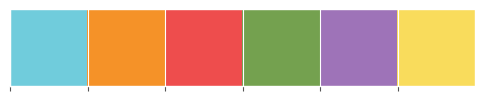

In [50]:
import os
import warnings
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
import pandas as pd
#import pandas_profiling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz # display the tree within a Jupyter notebook
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

import seaborn as sns
#html color codes
kats = ['#70ccdc', '#f59228', '#ee4d4d','#74a14f','#9e73b8','#f9dc5c']
sns.palplot(sns.color_palette(kats))


warnings.simplefilter("ignore")
%matplotlib inline

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
employee_eval = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/churn_ Desicion_Tree_Random_Forest/employee_stats.csv')

In [8]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,Sales,low
1,0.80,0.86,5,262,6,0,1,0,Sales,medium
2,0.11,0.88,7,272,4,0,1,0,Sales,medium
3,0.72,0.87,5,223,5,0,1,0,Sales,low
4,0.37,0.52,2,159,3,0,1,0,Sales,low


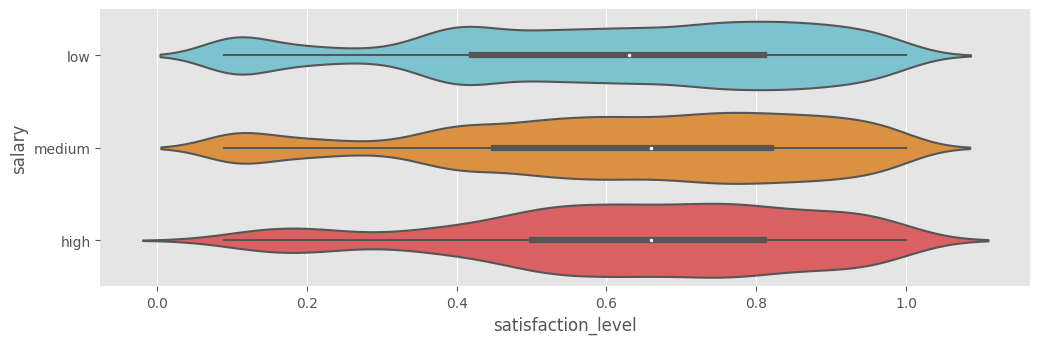

In [44]:
# @title salary vs satisfaction_level
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
plt.figure(figsize=figsize)

# Use the custom color palette directly in the violinplot function
sns.violinplot(employee_eval, x='satisfaction_level', y='salary', inner='box', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)

# Show the plot
plt.show()

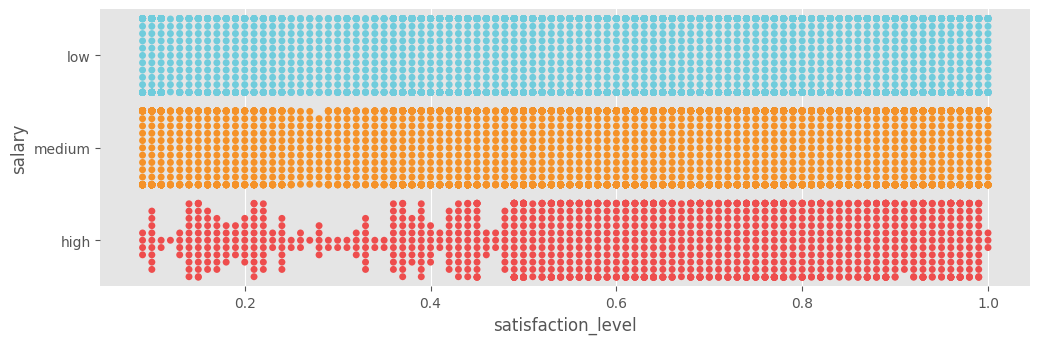

In [47]:
figsize = (12, 1.2 * len(employee_eval['salary'].unique()))
plt.figure(figsize=figsize)
sns.swarmplot(data=employee_eval, x='satisfaction_level', y='salary', palette=kats)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

KeyError: "'kats' is not a known colormap name"

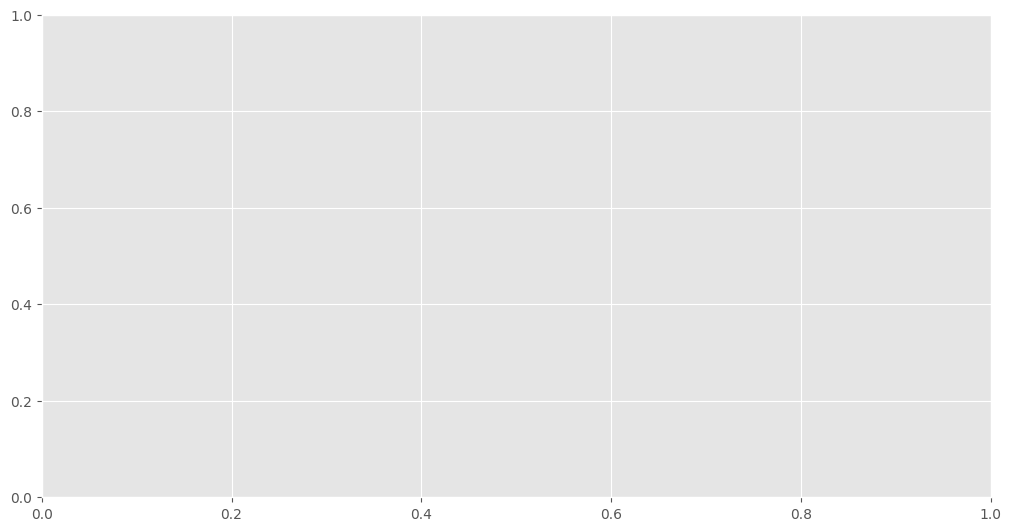

In [48]:
# @title time_spend_company vs average_montly_hours

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('kats'))
  xs = series['time_spend_company']
  ys = series['average_montly_hours']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = employee_eval.sort_values('time_spend_company', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('salary')):
  _plot_series(series, series_name, i)
  fig.legend(title='salary', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_spend_company')
_ = plt.ylabel('average_montly_hours')

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('kats')
#lightcoral paleturquoise
# Your scatter plot code
employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.175)

# Hide top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

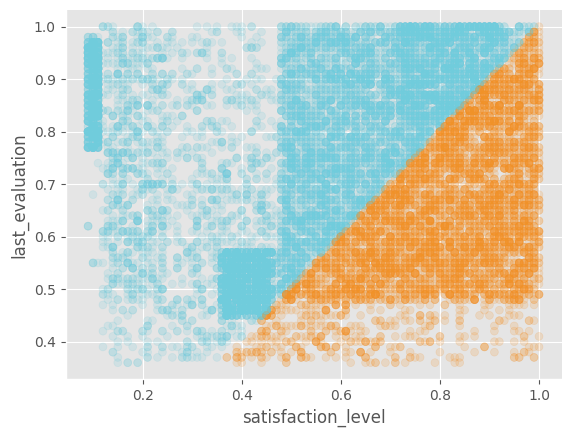

In [32]:

plt.style.use('kats')

# Define colors based on condition
colors = np.where(employee_eval['satisfaction_level'] < employee_eval['last_evaluation'], '#70ccdc', '#f59228')

# Your scatter plot code
employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=0.175, c=colors)

# Hide top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.show()

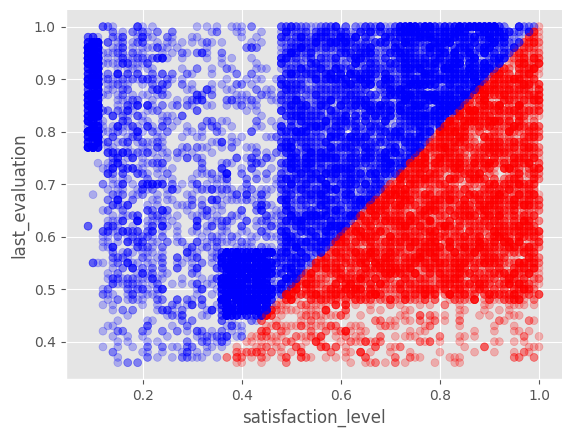

In [21]:
from matplotlib import pyplot as plt


colors = ['blue' if x < y else 'red' for x, y in zip(employee_eval['satisfaction_level'], employee_eval['last_evaluation'])]
employee_eval.plot(kind='scatter', x='satisfaction_level', y='last_evaluation', s=32, alpha=.8, c=colors)

# Hide the top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

plt.show()

In [ ]:
employee_eval.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'quit',
       'promotion_last_5years', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'],
      dtype='object')

In [ ]:
plt.rcParams['figure.figsize'] = (12,8)

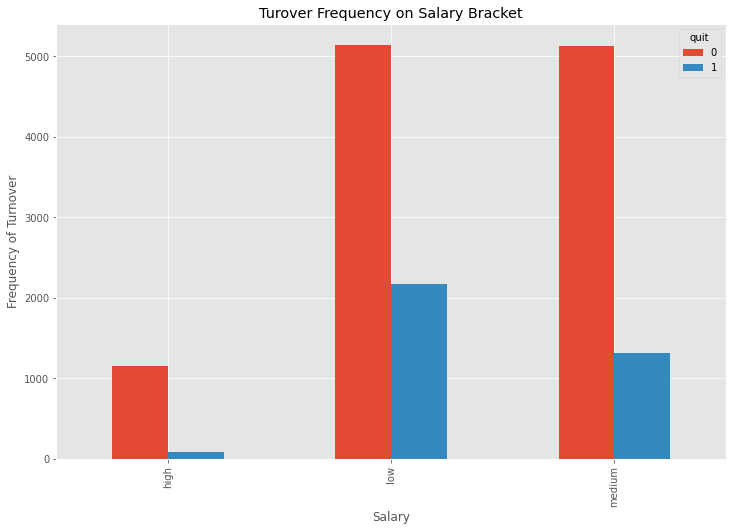

In [ ]:
pd.crosstab(employee_eval.salary, employee_eval.quit).plot(kind='bar')
plt.title('Turover Frequency on Salary Bracket')
plt.xlabel('Salary')
plt.ylabel('Frequency of Turnover')
plt.show()

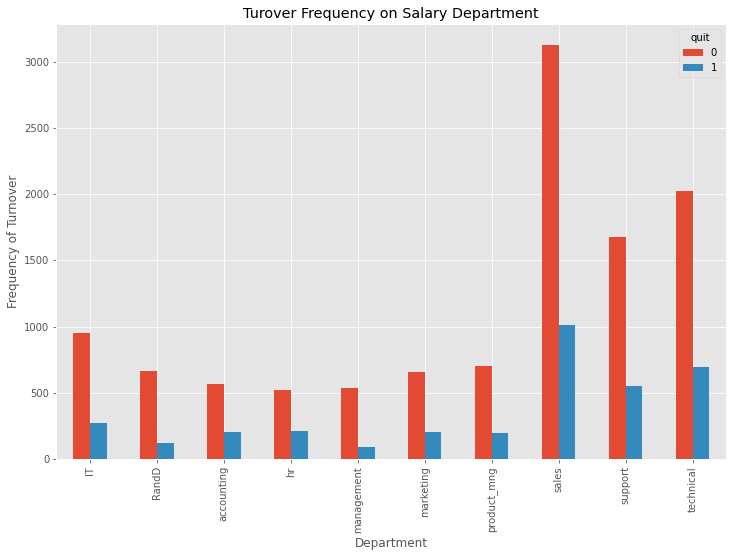

In [ ]:
pd.crosstab(employee_eval.department, employee_eval.quit).plot(kind='bar')
plt.title('Turover Frequency on Salary Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.show()

categorizing the variables.

In [ ]:
cat_vars = ['department', 'salary']
for var in cat_vars:
  cat_list = pd.get_dummies(employee_eval[var], prefix=var)
  employee_eval = employee_eval.join(cat_list)

In [ ]:
employee_eval.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
employee_eval.drop(columns = ['department', 'salary'], axis = 1, inplace = True)

In [ ]:
from yellowbrick.target import ClassBalance
plt.style.use("kats")
plt.rcParams['figure.figsize'] = (10,6)

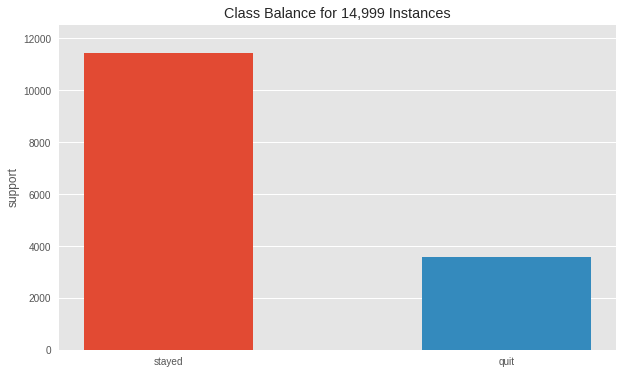

In [ ]:
visualizer = ClassBalance(labels=['stayed', 'quit'])
visualizer.fit(employee_eval.quit)
visualizer.show()

In [ ]:
X = employee_eval.loc[:, employee_eval.columns != 'quit']
y = employee_eval.quit

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2, stratify = y)

## Build an Interactive Decision Tree Classifier

Supervised learning:
- The inputs are random variables $X = X_1, ..., X_p$;
- The output is a random variable $Y.$


- Data is a finite set $$\mathbb{L}=\{(x_i,y_i)|i=0, ..., N-1\}$$
where $x_i \in X = X_1 \times ... \times X_p$ and $y_i \in y$ are randomly drawn from $P_{X,Y}.$

E.g., $(x_i,y_i)=((\text{salary = low, department = sales, ...}),\text{quit = 1})$

- The goal is to find a model $\varphi_\mathbb{L}: X \mapsto y$ minimizing $$\text{Err}(\varphi_\mathbb{L}) = \mathbb{E}_{X,Y}\{L(Y, \varphi_\mathbb{L}(X))\}.$$


About:

 - Decision trees are non-parametric models which can model arbitrarily complex relations between inputs and outputs, without any a priori assumption

- Decision trees handle numeric and categorical variables

- They implement feature selection, making them robust to noisy features (to an extent)

- Robust to outliers or errors in labels

- Easily interpretable by even non-ML practioners.


#### Decision trees: partitioning the feature space:

- Decision trees generally have low bias but have high variance.

In [ ]:
@interact
def plot_tree(crit=['gini', 'entropy'],
              split=['best', 'random'],
              depth=IntSlider(min=1,max=30,value=2, continuous_update=False),
              min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
              min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = DecisionTreeClassifier(random_state=0, criterion=crit, splitter=split, max_depth=depth,
                                     min_samples_split = min_split,  min_samples_leaf = min_leaf)

  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Decision Tree Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))

  graph = Source(tree.export_graphviz(estimator, out_file=None, feature_names=X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))

  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Build an Interactive Random Forest Classifier

Although randomization increases bias, it is possible to get a reduction in variance of the ensemble. Random forests are one of the most robust machine learning algorithms for a variety of problems.

- Randomization and averaging lead to a reduction in variance and improve accuracy
- The implementations are parallelizable
- Memory consumption and training time can be reduced by bootstrapping
- Sampling features and not solely sampling examples is crucial to improving accuracy

In [ ]:
@interact
def plot_tree_rf(crit=['gini', 'entropy'],
                 bootstrap=['True', 'False'],
                 depth=IntSlider(min=1,max=30,value=3, continuous_update=False),
                 forests=IntSlider(min=1,max=200,value=100,continuous_update=False),
                 min_split=IntSlider(min=2,max=5,value=2, continuous_update=False),
                 min_leaf=IntSlider(min=1,max=5,value=1, continuous_update=False)):

  estimator = RandomForestClassifier(random_state=1, criterion=crit, bootstrap=bootstrap,
                                     n_estimators=forests, max_depth=depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf,
                                     n_jobs= -1, verbose = False)
  estimator.fit(X_train, y_train)

  print('Random Forests Training Accuracy: {:.3f}'.format(accuracy_score(y_train, estimator.predict(X_train))))
  print('Random Forests Test Accuracy: {:.3f}'.format(accuracy_score(y_test, estimator.predict(X_test))))
  num_tree = estimator.estimators_[0]
  print('\Visualizing Tree: ', 0)


  graph = Source(tree.export_graphviz(num_tree, out_file = None, feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'], filled = True))

  display(Image(employee_eval = graph.pipe(format='png')))
  return estimator

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

## Feature Importance and Evaluation Metrics

In [ ]:
from yellowbrick.model_selection import FeatureImportances
plt.rcParams['figure.figsize'] = (16,12)
plt.style.use("kats")

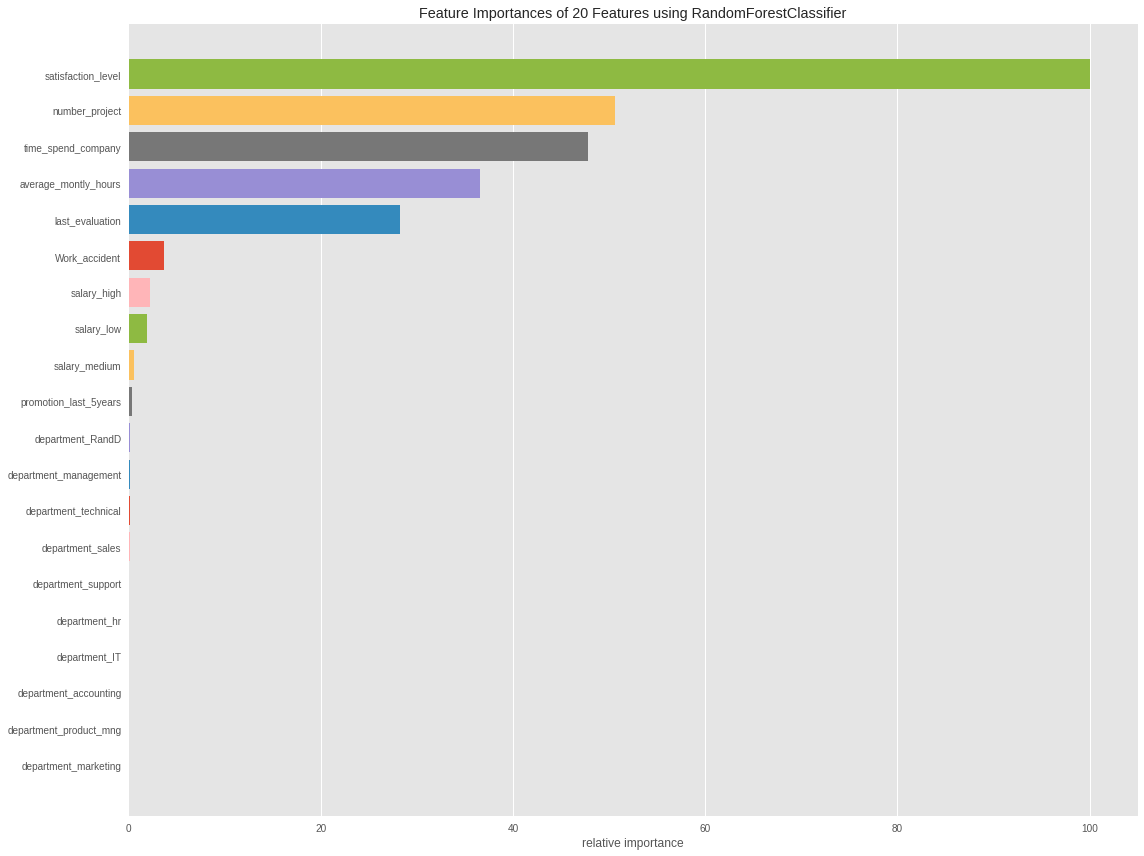

In [ ]:
rf = RandomForestClassifier(bootstrap='True', ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1,
                       warm_start=False)

viz = FeatureImportances(rf)
viz.fit(X_train, y_train)
viz.show(outpath="1.png")

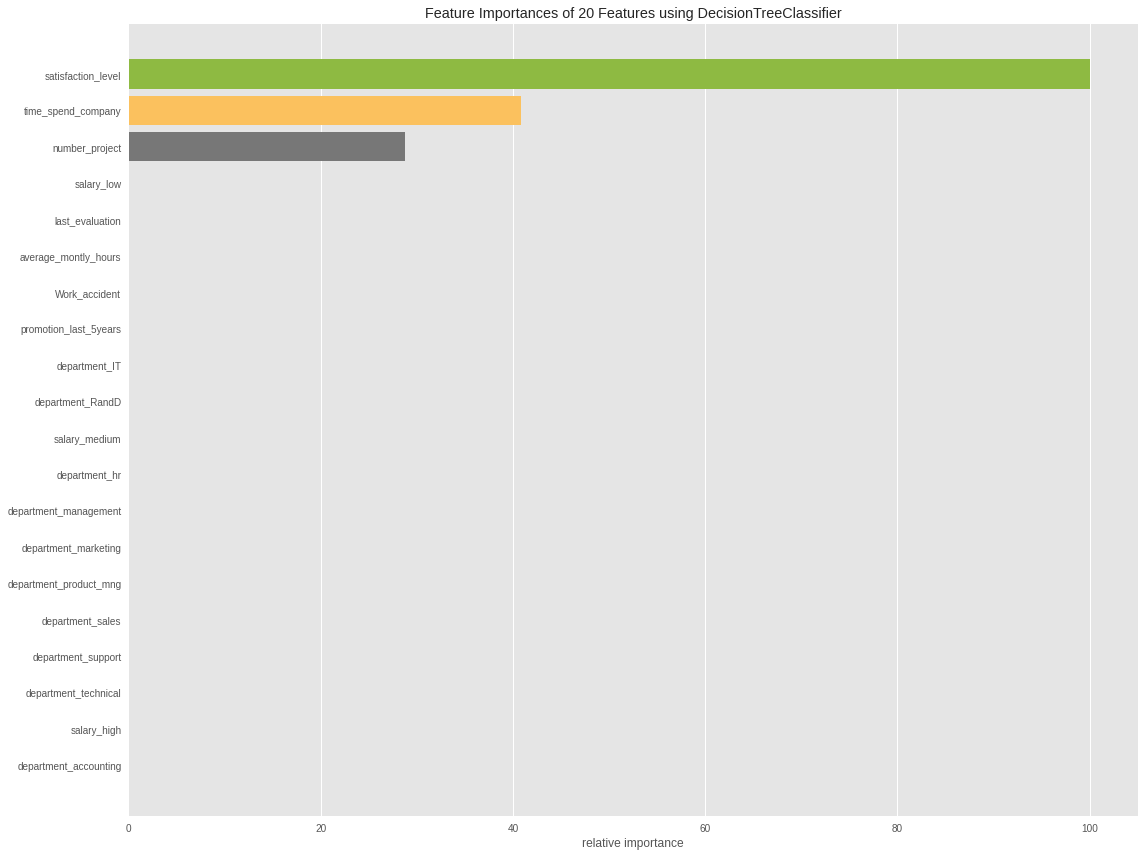

In [ ]:
dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=0, splitter='best')

viz = FeatureImportances(dt)
viz.fit(X_train, y_train)
viz.show()